In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Admission_Predict.csv', usecols=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '])
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [4]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]], shape=(400, 7))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 7), (80, 7), (320,), (80,))

In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(7, activation='relu',input_dim=7))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

c:\Code\Advance-Deep-Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.3817 - val_accuracy: 0.0000e+00 - val_loss: 0.2920
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.2369 - val_accuracy: 0.0000e+00 - val_loss: 0.2145
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1755 - val_accuracy: 0.0000e+00 - val_loss: 0.1699
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1433 - val_accuracy: 0.0000e+00 - val_loss: 0.1466
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1244 - val_accuracy: 0.0000e+00 - val_loss: 0.1299
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1125 - val_accuracy: 0.0000e+00 - val_loss: 0.1183
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1027 - val_accuracy: 0.0000e+00 - val_loss: 0.1092
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

In any kind of Online Judge a Jugde Engine is the heart of the computation. It is used for compile, execute & evaluate the submitted program by user in certain constrain such as imput size, time & memory. A system like UVA Online Judge and SPOJ build the pipeline - source code submission, compilation, execution against predefined test cases and lastly return verdict like on test cases like Accepted Not Accpeted. 
A key evaluation in Judge engine is to use Sandbox execution with Multithreaded worker architectures. A single thread worker can't handle large number of submission to solve this issure modern system adapt worker pools in each submission is dispatched process. These workers proceed in sandbox architecture like - chroot jails, cgroup or containerization architecture like dockers to provide security, CPU limitations , isolation.
Those features enables qualityfull feedback while preserving the deterministic and reproducable execution. Though a lot of platforms still treat feedback as an auxilliary features rather than a first class design goal.

Plagiarism detection in programming thorughly studied from simple structure to deep algorithm. Among those, MOSS remains the most widely adapted techniques. A fingerprint techniques designed for document or code similarity detection.
MOSS underlying uses winnowing algorithm, which operates by tokenizing source code, K-Grams, Hashing them and selecting the subset of hash using sliding window. Unlike naive string matching, winnowing is robust against common evasion type such as variable renaming, comment delete. Winnowing achieves a quite good balance between sensitiity and scalability.
A lot of alternatives are available such as AST( Abstract syntax tree ), neural embeddings graphs. Those algorithm can capture higher semantic similarity but need a handfull of computational cost.
Thus, MOSS and winnowing remain dominant in real world systems with transparency and efficiency.

In [15]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [13]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7307586687476813

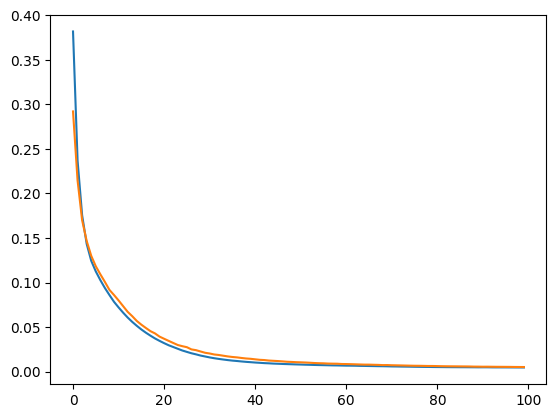

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])